<center><img src="Logo.png" alt="logo<h1><strong><center> Proyecto Individual MLOps N° 1 Año 2.023<center></strong></h1>

<h5 style="color:blue">
Presentado por el Alumno: Javier Edgar Esteban 
Ghithub: JavierEdgarEsteban77 
Carrera: DataScience Cohorte 05PT 02 Año 2.023</h5>

<h3 style="color:green">
Proyecto: Obtención del Minimum Viable Product (MUV) solicitado por la empresa Steam sobre la recomendación de videos juegos y optimización para usuarios: 'worried'</h3>

<h5 style="color:white">
Propuesta de Trabajo

En este notebook primero vamos a trabajar el Extract, Transform and Load (ETL) el cual trabajaremos el Rol de Data Engineer y posteriormente el 

Análisis Exploratorio de Datos (EDA).

La impronta que tendrá este trabajo individual desde el punto de vista técnico es extraer los datos en dónde trabajaremos los archivos:

steam_games.json; user__reviews.json y users_items.json

Cargo los datos de archivos JSON y los convierto en DataFrames de Pandas. Una vez transformados a nuestros df, estaremos en condición de la posterior preparación de la documentación para poder realizar un correcto análisis exploratorio que satisfaga las nececidades de nuestro cliente.

In [1]:
# Importo Librerías necesarias
import json
import pandas as pd
import ast
from tqdm import tqdm

# Creo la función para por leer las líneas de cada dataset
def leer_datos(ruta, tipo='json'):
    filas = []
    with open(ruta, encoding='utf-8') as f:
        for line in tqdm(f.readlines(), desc=f"Leyendo {ruta}"):
            if tipo == 'json':
                data = json.loads(line)
            elif tipo == 'literal':
                data = ast.literal_eval(line)
            filas.append(data)
    return pd.DataFrame(filas)

# Determino la ruta de cada dataset
ruta_games = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\Borrador no usar Proy Ind N° 1 Machine Learning Operations MLOps\Borrador PI_ML_OPS\Archivado Data\steam_games.json'
ruta_reviews = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\Borrador no usar Proy Ind N° 1 Machine Learning Operations MLOps\Borrador PI_ML_OPS\Archivado Data\user_reviews.json'
ruta_items = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\Borrador no usar Proy Ind N° 1 Machine Learning Operations MLOps\Borrador PI_ML_OPS\Archivado Data\users_items.json'

# Convierto en dataframe cada datasets
df_steam_games = leer_datos(ruta_games, tipo='json')
df_user_reviews = leer_datos(ruta_reviews, tipo='literal')
df_users_items = leer_datos(ruta_items, tipo='literal')

Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\Borrador no usar Proy Ind N° 1 Machine Learning Operations MLOps\Borrador PI_ML_OPS\Archivado Data\steam_games.json: 100%|██████████| 120445/120445 [00:01<00:00, 70172.94it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\Borrador no usar Proy Ind N° 1 Machine Learning Operations MLOps\Borrador PI_ML_OPS\Archivado Data\user_reviews.json: 100%|██████████| 25799/25799 [00:04<00:00, 5521.53it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\Borrador no usar Proy Ind N° 1 Machine Learning Operations MLOps\Borrador PI_ML_OPS\Archivado Data\users_items.json: 100%|██████████| 88310/88310 [03:41<00:00, 399.39it/s] 


<h3 style="color:green">
Ahora que tengo nuestros dataframes que se llaman: df_steam_games; df_user_reviews y df_users_items

<h5 style="color:blue">
Trabajaré son Steam Games

In [2]:
# Visualizo el contenido para poder analizar los pasos a seguir
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


#### Analizo la información contenida, normalizo mi df_steam_games y cambio el nombre de la columna id por 'user_id' para futura fusión con los otros df.

In [3]:
# Importo librería necesaria.
import pandas as pd

# Verifico los tipos de datos por columna.
print(df_steam_games.dtypes)

# Reviso las columnas
for col in df_steam_games.columns:
    print(f"Columna: {col}")
    print(f"Primer valor: {df_steam_games[col][0]}")
    
    # Convierto las listas a tuplas antes de llamar a unique()
    unique_values = pd.Series([tuple(x) if isinstance(x, list) else x for x in df_steam_games[col]]).unique()
    print(f"Valores únicos: {unique_values}\n")

publisher       object
genres          object
app_name        object
title           object
url             object
release_date    object
tags            object
reviews_url     object
specs           object
price           object
early_access    object
id              object
developer       object
dtype: object
Columna: publisher
Primer valor: nan
Valores únicos: [nan 'Kotoshiro' 'Making Fun, Inc.' ... 'OrtiGames/OrtiSoft' 'INGAME'
 'Bidoniera Games']

Columna: genres
Primer valor: nan
Valores únicos: [nan ('Action', 'Casual', 'Indie', 'Simulation', 'Strategy')
 ('Free to Play', 'Indie', 'RPG', 'Strategy')
 ('Casual', 'Free to Play', 'Indie', 'Simulation', 'Sports')
 ('Action', 'Adventure', 'Casual') ('Action', 'Adventure', 'Simulation')
 ('Free to Play', 'Indie', 'Simulation', 'Sports')
 ('Casual', 'Indie', 'Racing', 'Simulation')
 ('Action', 'Indie', 'Simulation', 'Early Access')
 ('Action', 'Adventure', 'Casual', 'Indie', 'RPG') ('Casual', 'Indie')
 ('Casual', 'Indie', 'Simulation')

In [5]:
# Importo las librerías necesarias
import pandas as pd

# Elimino las filas con valores NaN
df_steam_games = df_steam_games.dropna()

# Completo las URLs incompletas con 'Sin Dato'
df_steam_games['url'] = df_steam_games['url'].apply(lambda x: x if x != '' else 'Sin Dato')

# Convierto los valores 'Free To Play' en la columna 'price' a 0
df_steam_games['price'] = df_steam_games['price'].apply(lambda x: 0 if x == 'Free To Play' else x)

# Cambio el nombre de la columna 'id' a 'user_id'
df_steam_games = df_steam_games.rename(columns={'id': 'user_id'})

# Verifico los cambios
print(df_steam_games.head())

                 publisher                                             genres  \
88310            Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
88311     Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
88312         Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
88313                 彼岸领域                        [Action, Adventure, Casual]   
88315  Trickjump Games Ltd                    [Action, Adventure, Simulation]   

                      app_name                    title  \
88310      Lost Summoner Kitty      Lost Summoner Kitty   
88311                Ironbound                Ironbound   
88312  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
88313                  弹炸人2222                  弹炸人2222   
88315    Battle Royale Trainer    Battle Royale Trainer   

                                                     url release_date  \
88310  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
88311  http:

C:\Users\Esteban García\AppData\Local\Temp\ipykernel_1056\2806787723.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['url'] = df_steam_games['url'].apply(lambda x: x if x != '' else 'Sin Dato')
C:\Users\Esteban García\AppData\Local\Temp\ipykernel_1056\2806787723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['price'] = df_steam_games['price'].apply(lambda x: 0 if x == 'Free To Play' else x)


#### Observo que cuento con dos filas con Id nulo, la primera, tiene todos datos nulos, excepto la columna url y price, en cambio el segundo Id tiene datos nulos en la columna reviews_url e id y está replicada, veremos el procedimiento para limpiar los datos.

In [6]:
# Verifico las filas duplicadas
duplicados = df_steam_games[df_steam_games.duplicated(subset='user_id', keep=False)]
print(duplicados)

                 publisher    genres                          app_name  \
102204  Bethesda Softworks  [Action]  Wolfenstein II: The New Colossus   
102883  Bethesda Softworks  [Action]  Wolfenstein II: The New Colossus   

                                   title  \
102204  Wolfenstein II: The New Colossus   
102883  Wolfenstein II: The New Colossus   

                                                      url release_date  \
102204          http://store.steampowered.com/app/612880/   2017-10-26   
102883  http://store.steampowered.com/app/612880/Wolfe...   2017-10-26   

                                                     tags  \
102204  [Action, FPS, Gore, Violent, Alternate History...   
102883  [Action, FPS, Gore, Violent, Alternate History...   

                                              reviews_url  \
102204  http://steamcommunity.com/app/612880/reviews/?...   
102883  http://steamcommunity.com/app/612880/reviews/?...   

                                                    s

In [7]:
# Importo la biblioteca necesaria.
import pandas as pd

# Elimino las filas donde el título es 'Batman: Arkham City - Game of the Year Edition'.
df_steam_games = df_steam_games[df_steam_games['title'] != 'Batman: Arkham City - Game of the Year Edition']

# Elimino todos los duplicados.
df_steam_games.drop_duplicates(subset='user_id', inplace=True, keep='first')

# Verifico si todos los valores en la columna 'user_id' son enteros.
es_entero = df_steam_games['user_id'].apply(lambda x: isinstance(x, int)).all()
print(f"Todos los valores son enteros: {es_entero}")

# Verifico si todos los valores en la columna 'user_id' son cadenas de caracteres.
es_cadena = df_steam_games['user_id'].apply(lambda x: isinstance(x, str)).all()
print(f"Todos los valores son cadenas de caracteres: {es_cadena}")

# Elimino las filas con valores no numéricos en 'user_id'.
df_steam_games = df_steam_games[df_steam_games['user_id'].apply(lambda x: str(x).isdigit())]

# Paso el id a entero.
df_steam_games['user_id'] = df_steam_games['user_id'].astype('int')

# Chequeo las columnas.
print(df_steam_games.columns)

Todos los valores son enteros: False
Todos los valores son cadenas de caracteres: True
Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'user_id',
       'developer'],
      dtype='object')


In [8]:
# Verifica si hay duplicados después de la eliminación
duplicados = df_steam_games[df_steam_games.duplicated(subset='user_id', keep=False)]
print("Número de filas duplicadas después de la eliminación:", len(duplicados))

Número de filas duplicadas después de la eliminación: 0


In [9]:
# Importo la biblioteca necesaria
import pandas as pd
from tqdm import tqdm

# Verificar si las columnas existen en los DataFrames
if 'genres' in df_steam_games.columns and 'tags' in df_steam_games.columns:
    # Identificar las filas con valores faltantes en 'genres' y 'tags'
    missing_genres_steam = df_steam_games['genres'].isna()
    missing_tags_games = df_steam_games['tags'].isna()

    # Rellenar los valores faltantes con la moda
    df_steam_games.loc[missing_genres_steam, 'genres'] = df_steam_games['genres'].mode()[0]
    df_steam_games.loc[missing_tags_games, 'tags'] = df_steam_games['tags'].mode()[0]
else:
    print("Verifica los nombres de las columnas. No se encontraron 'genres' en df_steam_games o 'tags' en df_steam_games.")
    print("Columnas en df_steam_games: ", df_steam_games.columns)

# Creo un conjunto de géneros de juegos
genres = set(item for val in tqdm(df_steam_games['genres'].dropna(), desc="Creando conjunto de géneros") for item in val)

# Filtro las etiquetas 'tags' para mantener solo aquellas que están presentes en 'genres'
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: [item for item in x if item in genres] if isinstance(x, list) else x) 

# Relleno valores nulos en la columna 'genres' con valores correspondientes de 'tags'
df_steam_games['genres'].fillna(df_steam_games['tags'], inplace=True)

# Añado una función de valores de 'tags' a 'genres' que no estén ya presentes en 'genres'
def agregar_genres_tags(fila): 
    """
    Agrega los elementos de 'tags' a 'genres' si no están ya presentes.

    Args:
        fila (dict): Un diccionario que contiene al menos las claves 'genres' y 'tags'. 
                     Ambos, 'genres' y 'tags', deben ser listas.

    Returns:
        list: La lista 'genres' actualizada con los elementos de 'tags' que no estaban presentes.
    """
    genres = fila['genres']
    tags = fila['tags']
    if isinstance(tags,list) and isinstance(genres,list):
        for tag in tags:
            if tag not in genres:
                genres.append(tag)
    return genres

# Aplico la función 'agregar_genres_tags' a todos los elementos en el dataframe
df_steam_games['genres'] = df_steam_games.apply(lambda fila: agregar_genres_tags(fila), axis=1)

# Genero dummies para genres con la finalidad de generar variables ficticias para géneros de juegos
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x:".".join(x) if isinstance(x, list) else x)
dummies = df_steam_games['genres'].str.get_dummies(sep='.')
df_steam_games = pd.concat([df_steam_games,dummies],axis=1)

Creando conjunto de géneros: 100%|██████████| 22528/22528 [00:00<00:00, 683051.75it/s]


In [10]:
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
88310,Kotoshiro,Action.Casual.Indie.Simulation.Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,...,0,0,0,1,0,0,1,0,0,0
88311,"Making Fun, Inc.",Free to Play.Indie.RPG.Strategy,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG]",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0,...,0,1,0,0,0,0,1,0,0,0
88312,Poolians.com,Casual.Free to Play.Indie.Simulation.Sports,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Indie]",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,...,0,0,0,1,0,1,0,0,0,0
88313,彼岸领域,Action.Adventure.Casual,弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,...,0,0,0,0,0,0,0,0,0,0
88315,Trickjump Games Ltd,Action.Adventure.Simulation,Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation]",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Bidoniera Games,Action.Adventure.Casual.Indie,Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,...,0,0,0,0,0,0,0,0,0,0
120440,Ghost_RUS Games,Casual.Indie.Simulation.Strategy,Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,...,0,0,0,1,0,0,1,0,0,0
120441,Sacada,Casual.Indie.Strategy,LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,...,0,0,0,0,0,0,1,0,0,0
120442,Laush Studio,Indie.Racing.Simulation,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,...,0,0,1,1,0,0,0,0,0,0


#### En esta otra etapa de mi ETL, voy a trabajar sobre las columnas de precios.

In [11]:
# Importo la biblioteca necesaria
import pandas as pd


# Defino una función para reemplazar las cadenas de texto a 0.0
def replace_price(price):
    if isinstance(price, str):
        return 0.0
    else:
        return price

# Corrijo precios en steam_proc
df_steam_games['price'].replace({'Starting at $499.00': 499.0, 'Starting at $449.00': 499.0}, inplace=True)

# Aplico la función a la columna price
df_steam_games['price'] = df_steam_games['price'].apply(replace_price)

# Calculo la cantidad de valores nulos en cada columna
nulos = df_steam_games.isnull().sum()

# Calculo el porcentaje de filas con valores nulos en las columnas 'developer' y 'release_date'
porcentaje_nulos = 1 - df_steam_games.dropna(subset=["developer","release_date"]).shape[0] / df_steam_games.shape[0]

print(df_steam_games.head())
print(df_steam_games['price'].head())
print(df_steam_games['price'].tail())
print(df_steam_games['price'].describe())
print(df_steam_games['price'].value_counts())
print(nulos)
print(f'Porcentaje de nulos : {porcentaje_nulos}')

                 publisher                                       genres  \
88310            Kotoshiro      Action.Casual.Indie.Simulation.Strategy   
88311     Making Fun, Inc.              Free to Play.Indie.RPG.Strategy   
88312         Poolians.com  Casual.Free to Play.Indie.Simulation.Sports   
88313                 彼岸领域                      Action.Adventure.Casual   
88315  Trickjump Games Ltd                  Action.Adventure.Simulation   

                      app_name                    title  \
88310      Lost Summoner Kitty      Lost Summoner Kitty   
88311                Ironbound                Ironbound   
88312  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
88313                  弹炸人2222                  弹炸人2222   
88315    Battle Royale Trainer    Battle Royale Trainer   

                                                     url release_date  \
88310  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
88311  http://store.steampowered.com/app/643980/

#### Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y creación de la columna 'anio'

In [12]:
# Importo la librería necesaria
import pandas as pd
import datetime

# Defino una función para verificar si el año es válido
def es_ano_valido(anio):
    try:
        datetime.datetime.strptime(str(anio), '%Y')
        return True
    except ValueError:
        return False

# Convierto la columna release_date a datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Genero la columna año
df_steam_games['anio'] = df_steam_games['release_date'].dt.year

# Verifico si el año es válido
df_steam_games['es_ano_valido'] = df_steam_games['anio'].apply(es_ano_valido)

# Analizo los datos
print(df_steam_games)
print(df_steam_games['es_ano_valido'])
value_counts = df_steam_games['anio'].value_counts()
print(value_counts[value_counts == 1])

                  publisher                                       genres  \
88310             Kotoshiro      Action.Casual.Indie.Simulation.Strategy   
88311      Making Fun, Inc.              Free to Play.Indie.RPG.Strategy   
88312          Poolians.com  Casual.Free to Play.Indie.Simulation.Sports   
88313                  彼岸领域                      Action.Adventure.Casual   
88315   Trickjump Games Ltd                  Action.Adventure.Simulation   
...                     ...                                          ...   
120439      Bidoniera Games                Action.Adventure.Casual.Indie   
120440      Ghost_RUS Games             Casual.Indie.Simulation.Strategy   
120441               Sacada                        Casual.Indie.Strategy   
120442         Laush Studio                      Indie.Racing.Simulation   
120443             SIXNAILS                                 Casual.Indie   

                        app_name                     title  \
88310        Lost Summone

In [13]:
# Importo la biblioteca necesaria
import pandas as pd

# Creo una nueva columna 'anio_lanzamiento' que contiene el año de lanzamiento de cada juego
df_steam_games['anio_lanzamiento'] = df_steam_games['release_date'].dt.year

# Creo una nueva columna 'num_reviews' que contiene el número de reseñas de cada juego
df_steam_games['num_reviews'] = df_steam_games['reviews_url'].apply(lambda x: len(x))

# Obtengo los 10 juegos más populares de cada año
top_juegos_por_anio = df_steam_games.groupby('anio_lanzamiento').apply(lambda x: x.nlargest(10, 'num_reviews'))

# Muestro el DataFrame
print(top_juegos_por_anio[['app_name', 'anio_lanzamiento', 'num_reviews']])

                                                                  app_name  \
anio_lanzamiento                                                             
1983.0           89687                                       Dragon's Lair   
1984.0           89855                                           Space Ace   
                 110028                           The Castles of Dr. Creep   
1985.0           116377                                     Silent Service   
1986.0           99223                                           Alter Ego   
...                                                                    ...   
2018.0           88324                         Planetarium 2 - Zen Odyssey   
                 88325                             The first thrust of God   
                 88326                                 SNOW - Starter Pack   
2019.0           102742  The Legendary Player - Make Your Reputation - ...   
2021.0           101450                        Finding Paradise 

In [31]:
# Verifico
df_steam_games['anio_lanzamiento'].unique()

array([2018., 2017., 1997., 1998., 2016., 2006., 2005., 2003., 2007.,
       2002., 2000., 1995., 1996., 1994., 2001., 1993., 2004., 2008.,
       2009.,   nan, 1999., 1992., 1989., 2010., 2011., 2013., 2012.,
       2014., 1983., 1984., 2015., 1990., 1988., 1991., 1987., 1986.,
       2021., 2019., 1985.])

#### Continuando con nuestra verificación de que los datos contenidos en la columna anio_lanzamiento, sea efectivamente años, y no tengamos años nulos, como así también que se lanzaron los juegos mostrando como salida el top ten por año.

<h3 style="color:green">
Ahora bien analizamos los títulos de los juegos de Steam mediante el uso de técnicas de procesamiento del lenguaje natural en dónde encontraremos tendencias.

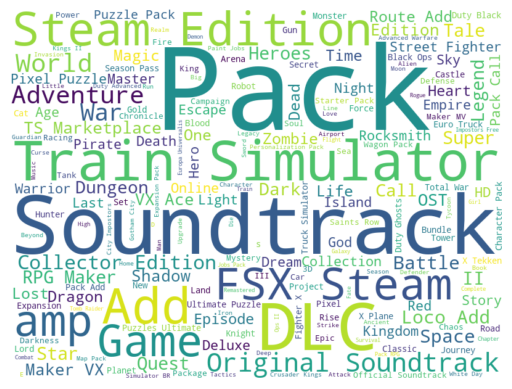

In [14]:
# Importo las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from wordcloud import WordCloud
from collections import Counter

def analyze_steam_game_titles(df_steam_games):
  """
  Analizo los títulos de los juegos de Steam.

  Args:
    df_steam_games: Un DataFrame de pandas con los juegos de Steam.

  Returns:
    Una lista con los títulos completos.
  """

  # Accedo a la columna de los títulos del DataFrame
  titles = df_steam_games["title"].tolist()

  return titles  # Devuelve una lista con los títulos completos

# Analizo los títulos de los juegos
titles = analyze_steam_game_titles(df_steam_games)

# Creo una nube de palabras con los títulos completos
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(' '.join(titles))

# Muestro la nube de palabras
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h5 style="color:orange">
Conclusión: podemos observar que los productos más consumidos son el género aventura y héroes y RPG en dónde los jugadores asumen el rol de un personaje.

<h3 style="color:blue">
Ahora trabajaré con User Reviews

In [32]:
# Ya realizada la carga anteiormente, vemos su contenido
df_user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


#### Observo que en la columna 'reviews' contiene un diccionario, lo voy a desanidar para agregar a mi actual df las nuevas columnas fruto del desanidado y consecuentemente procederé a realizar un análisis de experiencia de usuario por Análisis de Sentimientos.

In [33]:
# Importo librerías necesarias y descargo el léxico de VADER
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon', quiet=True)

# Creo el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Defino la función para clasificar los sentimientos
def classify_sentiment(text):
    """Clasifica el sentimiento de un texto dado utilizando la puntuación de polaridad.

    Args:
        text (str): El texto a clasificar.

    Returns:
        int: Retorna 2 si el texto es positivo, 0 si es negativo, y 1 si es neutral o 'Sin Dato'.
    """
    if text == 'Sin Dato':
        return 1  # Neutral
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 2  # Positivo
    elif sentiment_score['compound'] <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutral

# Desanido la columna 'reviews' y reemplazo los valores vacíos con 'Sin Dato'
df_u_r_desanidado = pd.json_normalize(df_user_reviews['reviews'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {'funny': 'Sin Dato', 'posted': 'Sin Dato', 'last_edited': 'Sin Dato', 'item_id': 'Sin Dato', 'helpful': 'Sin Dato', 'recommend': 'Sin Dato', 'review': 'Sin Dato'})).replace('', 'Sin Dato')

# Concateno el DataFrame original con el DataFrame desanidado
df_user_reviews_desanidado = pd.concat([df_user_reviews, df_u_r_desanidado], axis=1)

# Aplico la función a la columna de reseñas y elimino la columna 'review'
tqdm.pandas()
df_user_reviews_desanidado['sentiment_analysis'] = df_user_reviews_desanidado['review'].progress_apply(classify_sentiment)
df_user_reviews_desanidado.drop(columns=['review'], inplace=True)

# Muestra las primeras 5 filas de cada columna
print(df_user_reviews_desanidado.head())

100%|██████████| 25799/25799 [00:17<00:00, 1491.24it/s]

             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evcentric   
3              doctr                 http://steamcommunity.com/id/doctr   
4          maplemage             http://steamcommunity.com/id/maplemage   

                                             reviews  \
0  [{'funny': '', 'posted': 'Posted November 5, 2...   
1  [{'funny': '', 'posted': 'Posted June 24, 2014...   
2  [{'funny': '', 'posted': 'Posted February 3.',...   
3  [{'funny': '', 'posted': 'Posted October 14, 2...   
4  [{'funny': '3 people found this review funny',...   

                              funny                    posted last_edited  \
0                          Sin Dato  Posted November 5, 2011.    Sin Dato   
1                          Sin Dato     Posted June 24, 20

In [17]:
# Defino una función para convertir los valores a enteros si es posible
def to_int(x):
    """Intento convertir un valor dado a un entero. Si no es posible, retorna el valor original.

    Args:
        x (Any): El valor a convertir.

    Returns:
        Union[int, Any]: Retorna el valor convertido a int si es posible, de lo contrario retorna el valor original.
    """
    try:
        return int(x)
    except ValueError:
        return x
# Aplico la función a la columna 'user_id'
df_user_reviews_desanidado['user_id'] = df_user_reviews_desanidado['user_id'].apply(to_int)
# Veo ¿cómo quedaron las columnas de mi df?
print(df_user_reviews_desanidado.columns)

Index(['user_id', 'user_url', 'reviews', 'funny', 'posted', 'last_edited',
       'item_id', 'helpful', 'recommend', 'sentiment_analysis'],
      dtype='object')


### Procederé a calcular el porcentaje de las reseñas.

In [18]:
# Calculo el número total de reseñas
total_reviews = df_user_reviews_desanidado.shape[0]
# Calculo el número de reseñas en cada categoría de sentimiento
positive_reviews = df_user_reviews_desanidado[df_user_reviews_desanidado['sentiment_analysis'] == 2].shape[0]
neutral_reviews = df_user_reviews_desanidado[df_user_reviews_desanidado['sentiment_analysis'] == 1].shape[0]
negative_reviews = df_user_reviews_desanidado[df_user_reviews_desanidado['sentiment_analysis'] == 0].shape[0]
# Calculo los porcentajes
positive_percentage = (positive_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100

print(f"Porcentaje de reseñas positivas: {positive_percentage}%")
print(f"Porcentaje de reseñas neutrales: {neutral_percentage}%")
print(f"Porcentaje de reseñas negativas: {negative_percentage}%")

Porcentaje de reseñas positivas: 63.83580758944145%
Porcentaje de reseñas neutrales: 21.283770688786387%
Porcentaje de reseñas negativas: 14.88042172177216%


<h5 style="color:orange">
Conclusión: la mayoría de las reseñas de los juegos son positivas en un 63.84%, mientras que un 21.28% son neutrales y un 14.88% son negativas. Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular. Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.

In [19]:
# Analizo los outliers ya que veo que tenemos outliers
Q1 = df_user_reviews_desanidado['sentiment_analysis'].quantile(0.25)
Q3 = df_user_reviews_desanidado['sentiment_analysis'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_user_reviews_desanidado[(df_user_reviews_desanidado['sentiment_analysis'] < Q1 - 1.5 * IQR) | (df_user_reviews_desanidado['sentiment_analysis'] > Q3 + 1.5 * IQR)]

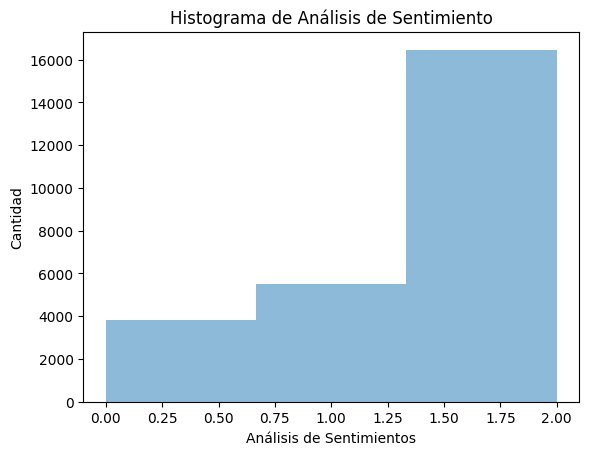

In [20]:
# Realizo una visualización de los datos para una mejor comprensión final
import matplotlib.pyplot as plt

plt.hist(df_user_reviews_desanidado['sentiment_analysis'], bins=3, alpha=0.5)
plt.xlabel('Análisis de Sentimientos')
plt.ylabel('Cantidad')
plt.title('Histograma de Análisis de Sentimiento')
plt.show()

<h5 style="color:gray">
“El histograma muestra la distribución de los resultados de nuestro análisis de sentimientos. La barra de la izquierda representa las reseñas con sentimiento negativo, la barra del medio representa las reseñas con sentimiento neutral, y la barra de la derecha representa las reseñas con sentimiento positivo. La altura de cada barra indica la cantidad de reseñas que caen en cada categoría de sentimiento.”

<h3 style="color:blue">
Ahora trabajaré el Users Items

In [21]:
# Ya realizada la carga anteiormente, vemos su contenido
df_users_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


#### Observo que en la columna 'items' contiene un diccionario, lo voy a desanidar para agregar a mi actual df las nuevas columnas fruto del desanidado y consecuentemente procederé a realizar una normalización de los datos para trabajar en ellos.

In [22]:
# Importo la librerías necesarias
import pandas as pd
from pandas import json_normalize
# Desanido la columna 'items'
df_u_i_desanidado = pd.json_normalize(df_users_items['items'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {'item_id': 'Sin Dato', 'item_name': 'Sin Dato'}))
# Reemplazo los valores vacíos con 'Sin Dato'
df_u_i_desanidado = df_u_i_desanidado.replace('', 'Sin Dato')
# Elimino la columna 'items' del DataFrame original
df_users_items = df_users_items.drop(columns=['items'])
# Concateno el DataFrame original con el DataFrame desanidado
df_users_items_desanidado = pd.concat([df_users_items, df_u_i_desanidado], axis=1)
# Imprimo las primeras 5 filas del DataFrame
print(df_users_items_desanidado.head())

             user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url item_id  \
0  http://steamcommunity.com/profiles/76561197970...      10   
1               http://steamcommunity.com/id/js41637      10   
2             http://steamcommunity.com/id/evcentric    1200   
3            http://steamcommunity.com/id/Riot-Punch      10   
4                 http://steamcommunity.com/id/doctr     300   

                       item_name  playtime_forever  playtime_2weeks  
0                 Counter-Strike               6.0              0.0  
1                 Counter-Strike               0.0              0.0  
2  Red Orchestra: Ostfront 41-45             923.0              0.0 

#### Lo que haré a continuación, es un análisis de tiempo de juego y detección de Outliers.

In [23]:
# Importo librerías necesarias
import pandas as pd

# Verifico los valores nulos y los tipos de datos
print(df_users_items_desanidado.isnull().sum())
print(df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']].dtypes)

# Lleno los valores nulos con 0
df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']] = df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']].fillna(0)

# Creo una función para detectar outliers
def detect_outliers(df, column):
    """Detecta los valores atípicos en una columna específica de un DataFrame utilizando el método del rango intercuartil (IQR).

    Args:
        df (pandas.DataFrame): El DataFrame en el que se buscarán los valores atípicos.
        column (str): El nombre de la columna en la que se buscarán los valores atípicos.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene solo las filas del DataFrame original que tienen valores atípicos en la columna especificada.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

# Detecto los outliers para 'playtime_forever' y 'playtime_2weeks'
outliers_forever = detect_outliers(df_users_items_desanidado, 'playtime_forever')
outliers_2weeks = detect_outliers(df_users_items_desanidado, 'playtime_2weeks')

# Muestro un resumen estadístico de la actividad del jugador y los outliers detectados
print(df_users_items_desanidado.describe())
print(outliers_forever)
print(outliers_2weeks)

user_id                 0
items_count             0
steam_id                0
user_url                0
item_id                 0
item_name               0
playtime_forever    16806
playtime_2weeks     16806
dtype: int64
playtime_forever    float64
playtime_2weeks     float64
dtype: object
        items_count  playtime_forever  playtime_2weeks
count  88310.000000      88310.000000     88310.000000
mean      58.353629       2915.249236        12.221277
std      122.312095      10927.103790       171.312293
min        0.000000          0.000000         0.000000
25%        3.000000          0.000000         0.000000
50%       26.000000        132.000000         0.000000
75%       73.000000       1282.000000         0.000000
max     7762.000000     388621.000000     14201.000000
                 user_id  items_count           steam_id  \
6             NitemarePK          304  76561197990951820   
8              maplemage          629  76561198026584251   
12            jorellpogi          

#### Voy a proceder a visualizar en gráficos subplots para comparar los resultados de ambos y manejo de outliers en Tiempos de Juego de Usuarios de Steam y manejo de outliers.

C:\Users\Esteban García\AppData\Local\Temp\ipykernel_1056\1288019086.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


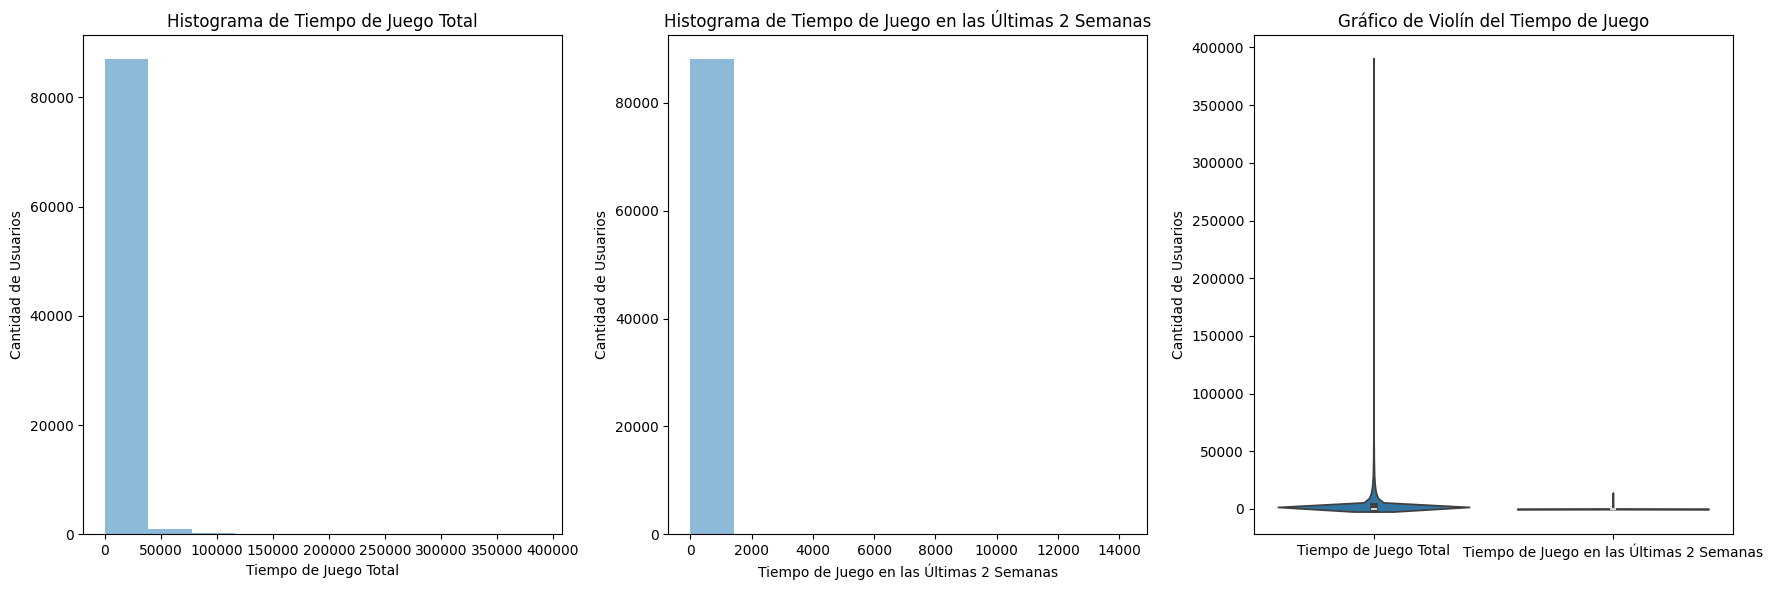

In [24]:
# Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Defino el plot
def plot_histogram(ax, data, title, xlabel, ylabel):
    ax.hist(data, bins=10, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def plot_violinplot(ax, data, labels, ylabel, title):
    sns.violinplot(ax=ax, data=data)
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Defino los outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    P95 = df[column].quantile(0.95)
    df.loc[df[column] > Q3 + 1.5 * IQR, column] = P95

# Creo una figura y tres ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creo los histogramas y el gráfico de violín
plot_histogram(axs[0], df_users_items_desanidado['playtime_forever'], 'Histograma de Tiempo de Juego Total', 'Tiempo de Juego Total', 'Cantidad de Usuarios')
plot_histogram(axs[1], df_users_items_desanidado['playtime_2weeks'], 'Histograma de Tiempo de Juego en las Últimas 2 Semanas', 'Tiempo de Juego en las Últimas 2 Semanas', 'Cantidad de Usuarios')
plot_violinplot(axs[2], df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']], ['Tiempo de Juego Total', 'Tiempo de Juego en las Últimas 2 Semanas'], 'Cantidad de Usuarios', 'Gráfico de Violín del Tiempo de Juego')

# Muestro los gráficos
plt.tight_layout()
plt.show()

# Manejo los outliers para 'playtime_forever' y 'playtime_2weeks'
handle_outliers(df_users_items_desanidado, 'playtime_forever')
handle_outliers(df_users_items_desanidado, 'playtime_2weeks')

# Lleno los valores nulos con 0
df_users_items_desanidado['playtime_forever'].fillna(0, inplace=True)
df_users_items_desanidado['playtime_2weeks'].fillna(0, inplace=True)

<h5 style="color:gray">
Los tres gráficos proporcionan una visión detallada de los patrones de juego de los usuarios. El primer gráfico, un histograma del tiempo total de juego, muestra que la mayoría de los usuarios han jugado menos de 50,000 minutos en total, indicando que la mayoría de los usuarios son jugadores ocasionales. Sin embargo, hay algunos usuarios que han jugado mucho más, lo que indica la presencia de jugadores más dedicados.

El segundo gráfico es un histograma del tiempo de juego en las últimas 2 semanas. Este gráfico muestra una mayor variabilidad en el tiempo de juego, lo que podría indicar que los patrones de juego de los usuarios cambian con el tiempo, posiblemente debido a factores como el lanzamiento de nuevos juegos, actualizaciones de juegos existentes, o cambios en el tiempo libre de los usuarios.

El tercer gráfico es un boxplot que compara la distribución del tiempo total de juego y el tiempo de juego en las últimas 2 semanas. Este gráfico destaca la existencia de outliers, que son usuarios que han jugado significativamente más que otros. Estos outliers podrían ser jugadores extremadamente dedicados o podrían indicar comportamientos de juego anómalos que podrían ser de interés para futuras investigaciones.

En conjunto, estos gráficos ofrecen una visión detallada de cómo los usuarios interactúan con los juegos a lo largo del tiempo, lo que podría ser útil para entender mejor los comportamientos de los jugadores y para informar decisiones sobre el diseño de juegos y la orientación de marketing.

#### Procederé a guardar en formato csv cada df que he trabajado ya que no observo datos atípicos ni anomalías.

In [27]:
# Importo la librería que necesito
import os

# Diccionario de tus DataFrames y los nombres deseados para los archivos CSV
dataframes = {
    'df_steam_games': 'steam_games',
    'df_user_reviews_desanidado': 'user_reviews',
    'df_users_items_desanidado': 'users_items'
}

# Ruta base donde se guardarán los archivos CSV
ruta_base = r'C:\Users\Esteban García\OneDrive\Escritorio\Proy Ind N° 1 MLOps\Data'

for df_nombre, csv_nombre in dataframes.items():
    # Crear la ruta completa del archivo CSV
    ruta_archivo_csv = os.path.join(ruta_base, f'{csv_nombre}.csv')   
    # Guardar el DataFrame como archivo CSV
    globals()[df_nombre].to_csv(ruta_archivo_csv, index=False)

<h5 style="color:green">
Ahora lo que voy a realizar es entregar un modelo con sus respectivas etapas de modelado:

Evaluación del modelo.

Optimización del modelo.

Despliegue del modelo como paso final.

In [29]:
# Importo librerías necesarias
import pandas as pd
from tqdm import tqdm

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv')
df_user_reviews_desanidado = pd.read_csv(r'Data\user_reviews.csv')
df_users_items_desanidado = pd.read_csv(r'Data\users_items.csv')

# Tomo una muestra de 100 datos de cada DataFrame
df_steam_games_sample = df_steam_games.sample(100)
df_user_reviews_desanidado_sample = df_user_reviews_desanidado.sample(100)
df_users_items_desanidado_sample = df_users_items_desanidado.sample(100)

def PlayTimeGenre(genero: str):
    # Filtro df_steam_games_sample por género
    games_of_genre = df_steam_games_sample[df_steam_games_sample[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado_sample por juegos del género especificado
    playtime_of_genre = df_users_items_desanidado_sample[df_users_items_desanidado_sample['item_name'].isin(games_of_genre)]
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('anio')['playtime_forever'].sum()
    
    # Encuentro el año con más horas jugadas
    year_with_most_playtime = playtime_by_year.idxmax()
    
    return {"Año de lanzamiento con más horas jugadas para " + genero : year_with_most_playtime}

def UserForGenre(genero: str):
    # Filtro df_steam_games_sample por género
    games_of_genre = df_steam_games_sample[df_steam_games_sample[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado_sample por juegos del género especificado
    playtime_of_genre = df_users_items_desanidado_sample[df_users_items_desanidado_sample['item_name'].isin(games_of_genre)]
    
    # Agrupo por usuario y sumar playtime_forever
    playtime_by_user = playtime_of_genre.groupby('user_id')['playtime_forever'].sum()
    
    # Encuentro el usuario con más horas jugadas
    user_with_most_playtime = playtime_by_user.idxmax()
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('anio')['playtime_forever'].sum().reset_index()
    
    # Convierto el DataFrame a una lista de diccionarios
    playtime_list = playtime_by_year.to_dict('records')
    
    return {"Usuario con más horas jugadas para " + genero : user_with_most_playtime, "Horas jugadas": playtime_list}

def UsersRecommend(año: int):
    # Filtro df_user_reviews_desanidado_sample por año y recomendación
    recommended_games = df_user_reviews_desanidado_sample[(df_user_reviews_desanidado_sample['posted'] == año) & (df_user_reviews_desanidado_sample['recommend'] == True)]
    
    # Cuento las recomendaciones por juego
    recommendations_by_game = recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos más recomendados
    top_3_games = recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def UsersNotRecommend(año: int):
    # Filtro df_user_reviews_desanidado_sample por año y no recomendación
    not_recommended_games = df_user_reviews_desanidado_sample[(df_user_reviews_desanidado_sample['posted'] == año) & (df_user_reviews_desanidado_sample['recommend'] == False)]
    
    # Cuento las no recomendaciones por juego
    not_recommendations_by_game = not_recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos menos recomendados
    top_3_games = not_recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def sentiment_analysis(año: int):
    # Filtro df_user_reviews_desanidado_sample por año
    reviews_of_year = df_user_reviews_desanidado_sample[df_user_reviews_desanidado_sample['posted'] == año]
    
    # Cuento las reseñas para análisis de sentimiento
    sentiment_counts = reviews_of_year['sentiment_analysis'].value_counts().to_dict()
    
    return sentiment_counts

In [30]:
print(df_steam_games.columns)
print(df_user_reviews_desanidado.columns)
print(df_users_items_desanidado.columns)

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'user_id',
       'developer', 'Action', 'Adventure', 'Animation &amp; Modeling',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing', 'anio', 'es_ano_valido',
       'anio_lanzamiento', 'num_reviews'],
      dtype='object')
Index(['user_id', 'user_url', 'reviews', 'funny', 'posted', 'last_edited',
       'item_id', 'helpful', 'recommend', 'sentiment_analysis'],
      dtype='object')
Index(['user_id', 'items_count', 'steam_id', 'user_url', 'item_id',
       'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')
